<a href="https://colab.research.google.com/github/2303A52102/AIML_2303A52102/blob/main/AIML_Lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1 Implement Breadth First Search Algorithm using a Queue
1. Given a graph with adjacency list and a starting vertex and we have to traverse the graph.
2. We will first print the value in the starting vertex,
3. Continue to print the value of neighbors of the starting vertex and
4. Next move on to the next level after completing the current level till all the vertices of the graph are printed.

In [ ]:
from queue import Queue
graph={0:[1,3],1:[0,2,3],2:[1,4,5],3:[0,1,4],4:[2,3,5],5:[2,4]}
print(graph)

{0: [1, 3], 1: [0, 2, 3], 2: [1, 4, 5], 3: [0, 1, 4], 4: [2, 3, 5], 5: [2, 4]}


In [ ]:
def bfs(graph,source):
  Q=Queue()
  visited_vertices=set()
  Q.put(source)
  visited_vertices.update({0})
  while not Q.empty():
    vertex=Q.get()
    print(vertex,end="-->")
    for u in graph[vertex]:
      if u not in visited_vertices:
        Q.put(u)
        visited_vertices.update({u})
print("BFS traversal of growth with source 0 is:")
bfs(graph,0)

BFS traversal of growth with source 0 is:
0-->1-->3-->2-->4-->5-->

Part 2 Implement Depth First Search Algorithm using a Stack
 0.1 DFS Stack implementations steps to be followed:
 1. Start at the root node and push it onto the stack.
 2. Check for any adjacent nodes of the tree and select one node.
 3. Traverse the entire branch of the selected node and push all the nodes into the stack.
 4. Upon reaching the end of a branch (no more adjacent nodes) ie nth leaf node, move
 back by a single step and look for adjacent nodes of the n-1th node.
 5. If there are adjacent nodes for the n-1th node, traverse those branches and push nodes
 onto the stack

In [1]:
graph1={
    'A' : ['B','S'],
    'B' : ['A'],
    'C' : ['D','E','F','S'],
    'D' : ['C'],
    'E' : ['C','H'],
    'F' : ['C','G'],
    'G' : ['F','S'],
    'H' : ['E','G'],
    'S' : ['A','C','G']
}
def dfs(graph,node,visited):
  if node not in visited:
    visited.append(node)
    for k in graph[node]:
      dfs(graph,k,visited)
  return visited
visited=dfs(graph1,'D',[])
print(visited)

['D', 'C', 'E', 'H', 'G', 'F', 'S', 'A', 'B']


Part 3 – Implement A* Algorithm using Numpy

A*Algorithm (pronounced as A-star) is a combination of ‘branch and bound search algorithm’ and ‘best search algorithm’ combined with the dynamic programming principle.
The A* Algorithm is well-known because it is used for locating path and graph traversals.
This algorithm is used in numerous online maps and games.
It uses a heuristic or evaluation function usually denoted by f(X) to determine the order in which the search visits nodes in the tree.
The heuristic function for a node N is defined as follows: f(x) = g(x) + h(x) (1) where g(x) is the actual cost estimate, h(x) is the heuristic cost estimate for the gives 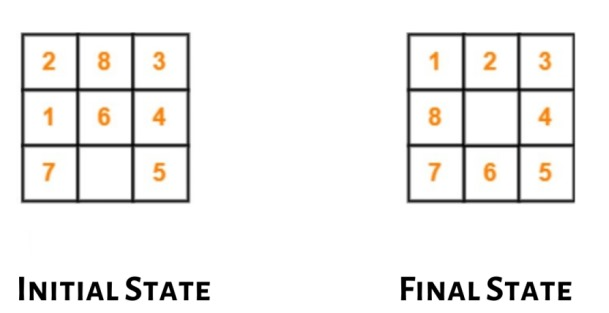

In [2]:
from copy import deepcopy
import numpy as np
import time

def bestsolution(state):
    bestsol = np.array([], int).reshape(-1, 9)
    count = len(state) - 1
    while count != -1:
        bestsol = np.insert(bestsol, 0, state[count]['puzzle'], 0)
        count = (state[count]['parent'])
    return bestsol.reshape(-1, 3, 3)


# checks for the uniqueness of the iteration(it).
def all(checkarray):
    set=[]
    for it in set:
        for checkarray in it:
            return 1
        else:
            return 0


# number of misplaced tiles
def misplaced_tiles(puzzle,goal):
    mscost = np.sum(puzzle != goal) - 1
    return mscost if mscost > 0 else 0


def coordinates(puzzle):
    pos = np.array(range(9))
    for p, q in enumerate(puzzle):
        pos[q] = p
    return pos


# start of 8 puzzle evaluvation, using Misplaced tiles heuristics
def evaluvate_misplaced(puzzle, goal):
    steps = np.array([('up', [0, 1, 2], -3),('down', [6, 7, 8],  3),('left', [0, 3, 6], -1),('right', [2, 5, 8],  1)],
                dtype =  [('move',  str, 1),('position', list),('head', int)])

    dtstate = [('puzzle',  list),('parent', int),('gn',  int),('hn',  int)]

    costg = coordinates(goal)

    # initializing the parent, gn and hn, where hn is misplaced_tiles  function call
    parent = -1
    gn = 0
    hn = misplaced_tiles(coordinates(puzzle), costg)
    state = np.array([(puzzle, parent, gn, hn)], dtstate)

   #priority queues with position as keys and fn as value.
    dtpriority = [('position', int),('fn', int)]

    priority = np.array([(0, hn)], dtpriority)

    while 1:
        priority = np.sort(priority, kind='mergesort', order=['fn', 'position'])
        position, fn = priority[0]
        # sort priority queue using merge sort,the first element is picked for exploring.
        priority = np.delete(priority, 0, 0)
        puzzle, parent, gn, hn = state[position]
        puzzle = np.array(puzzle)

        blank = int(np.where(puzzle == 0)[0])

        gn = gn + 1
        c = 1
        start_time = time.time()
        for s in steps:
            c = c + 1
            if blank not in s['position']:
                openstates = deepcopy(puzzle)
                openstates[blank], openstates[blank + s['head']] = openstates[blank + s['head']], openstates[blank]

                if ~(np.all(list(state['puzzle']) == openstates, 1)).any():
                    end_time = time.time()
                    if (( end_time - start_time ) > 2):
                        print(" The 8 puzzle is unsolvable \n")
                        break

                    hn = misplaced_tiles(coordinates(openstates), costg)
                    # generate and add new state in the list
                    q = np.array([(openstates, position, gn, hn)], dtstate)
                    state = np.append(state, q, 0)
                    # f(n) is the sum of cost to reach node
                    fn = gn + hn

                    q = np.array([(len(state) - 1, fn)], dtpriority)
                    priority = np.append(priority, q, 0)

                    if np.array_equal(openstates, goal):
                        print(' The 8 puzzle is solvable \n')
                        return state, len(priority)

    return state, len(priority)


# initial state
puzzle = []

puzzle.append(2)
puzzle.append(8)
puzzle.append(3)
puzzle.append(7)
puzzle.append(1)
puzzle.append(4)
puzzle.append(0)
puzzle.append(6)
puzzle.append(5)

#goal state
goal = []

goal.append(1)
goal.append(2)
goal.append(3)
goal.append(8)
goal.append(0)
goal.append(4)
goal.append(7)
goal.append(6)
goal.append(5)


state, visited = evaluvate_misplaced(puzzle, goal)
bestpath = bestsolution(state)
print(str(bestpath).replace('[', ' ').replace(']', ''))
totalmoves = len(bestpath) - 1
print('\nSteps to reach goal:',totalmoves)
visit = len(state) - visited
print('Total nodes visited: ',visit, "\n")

 The 8 puzzle is solvable 

   2 8 3
   7 1 4
   0 6 5

   2 8 3
   0 1 4
   7 6 5

   2 8 3
   1 0 4
   7 6 5

   2 0 3
   1 8 4
   7 6 5

   0 2 3
   1 8 4
   7 6 5

   1 2 3
   0 8 4
   7 6 5

   1 2 3
   8 0 4
   7 6 5

Steps to reach goal: 6
Total nodes visited:  11 



<ipython-input-2-f1708b19b664>:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  blank = int(np.where(puzzle == 0)[0])
